# 北京二手房房价分析与预测问题

## 目的
北京房价是最受关注的话题之一。因此，本项目以研究北京二手房房价为目的，对二手房房价进行数据分析。
北京房价是最受关注的话题。因此，本项目以研究北京二手房房价为目的，对二手房房价进行数据分析，并希望能对未来房价进行预测（仅供参考）。
- 统计北京各区域二手房房价情况
- 统计北京各区域二手房数量
- 统计西城区、东城区和海淀区各地方二手房房价
- 统计房价与房屋面积区段的房屋数量
- 预测北京二手房房价

### 技术和工具
本项目以Python语言编程完成数据分析。
- 数据分析：`pandas`，`numpy`，`matplolib`


## 1. 数据导入和清洗

### 导入链家数据集

In [44]:
import pandas as pd
import numpy as np
# 导入链家二手房数据
lianjia_df = pd.read_csv('lianjia.csv')
anjuke_df = pd.read_csv('anjuke.csv')
print('链家原始数据：')
lianjia_df.head()

链家原始数据：


,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [45]:
print('安居客原始数据：')
anjuke_df.head()

安居客原始数据：


,Floor,Garden,Layout,Price,Region,Size,Year
0,25,兴达公寓,2室2厅,107.0,通州-马驹桥-科,76,2017
1,13,中铁华侨城和园,4室2厅,750.0,大兴-瀛海镇-公,136,2017
2,6,北营房小区,3室1厅,600.0,西城-阜成门-北,66,1988
3,22,首开璞瑅,3室2厅,698.0,丰台-方庄-方,102,2017
4,3,丽京花园,2室2厅,613.0,顺义-天竺-首,153,1999


In [46]:
# 删除链家csv数据中多余的列 
drop_column = ['Direction', 'Elevator', 'Id', 'Renovation']
lianjia_df_clean = lianjia_df.drop(drop_column, axis = 'columns') #0或者index表示行 1或者colums表示列
# 自定义列顺序
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Price']
lianjia_df_customize = pd.DataFrame(lianjia_df_clean, columns = columns)
lian_num = lianjia_df_customize['Region'].count()
print('整理后的链家', lian_num,'条数据：')
lianjia_df_customize.head()

整理后的链家 23677 条数据：


,Region,District,Garden,Layout,Floor,Year,Size,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,998.0


In [47]:
# 一列拆分为两列
anjuke_df['District'] = anjuke_df['Region'].str.extract(r'.+?-(.+?)-.+?', expand = False)
anjuke_df['Region'] = anjuke_df['Region'].str.extract(r'(.+?)-.+?-.+?', expand = False)
anjuke_df_customize = pd.DataFrame(anjuke_df, columns = columns)
an_num = anjuke_df['Region'].count()
print('整理后的安居客', an_num,'条数据：')
anjuke_df_customize.head()

整理后的安居客 3000 条数据：


,Region,District,Garden,Layout,Floor,Year,Size,Price
0,通州,马驹桥,兴达公寓,2室2厅,25,2017,76,107.0
1,大兴,瀛海镇,中铁华侨城和园,4室2厅,13,2017,136,750.0
2,西城,阜成门,北营房小区,3室1厅,6,1988,66,600.0
3,丰台,方庄,首开璞瑅,3室2厅,22,2017,102,698.0
4,顺义,天竺,丽京花园,2室2厅,3,1999,153,613.0


In [48]:
# 合并两家数据
df = pd.merge(lianjia_df_customize, anjuke_df_customize, how = 'outer')
print('一共', df['Region'].count(), '数据')
df.head()


一共 26649 数据


,Region,District,Garden,Layout,Floor,Year,Size,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0
4,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0


In [49]:
# 增加一列去计算每平方的价格
df['PriceMs'] = df['Price'] / df['Size']
df.head()

,Region,District,Garden,Layout,Floor,Year,Size,Price,PriceMs
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,780.0,10.400000
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,705.0,11.750000
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,1400.0,6.666667
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0,10.769231
4,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0,10.769231


In [50]:
# 对空值进行清洗
df.dropna(how = 'any')
# 对重复值进行清洗
df.drop_duplicates(keep = 'first', inplace = True)
# 有些别墅单价过高，删除价格大于25万一平的
df = df.loc[df['PriceMs'] < 25]
df.head()

,Region,District,Garden,Layout,Floor,Year,Size,Price,PriceMs
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,780.0,10.400000
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,705.0,11.750000
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,1400.0,6.666667
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,420.0,10.769231
5,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,998.0,11.088889


In [51]:
dif = an_num + lian_num - df['Year'].count()
print("过滤了%d数据"%(dif))

过滤了2396数据


## 可视化分析
北京各区域二手房房价均值对比 & 二手房数量对比

In [52]:
# 统计北京二手房房子数量
df_num = df.groupby('Region')['Floor'].count().sort_values(ascending = False)
df_num

Region
朝阳       3147
海淀       2885
昌平       2878
丰台       2865
西城       2115
大兴       2106
通州       1600
房山       1575
东城       1517
顺义       1343
石景山       877
门头沟       500
亦庄开发区     457
北京周边      243
密云         89
平谷         51
怀柔         30
延庆          3
Name: Floor, dtype: int64

In [53]:
# 统计北京二手房房价均值
df_mean = df.groupby('Region')['PriceMs'].mean().sort_values(ascending = False)
df_mean

Region
西城       10.710194
东城        9.897345
海淀        8.643937
朝阳        7.157441
丰台        5.781461
石景山       5.553180
亦庄开发区     4.721659
大兴        4.529565
通州        4.467039
顺义        4.316975
昌平        4.285696
门头沟       4.056528
怀柔        3.634485
房山        3.461693
平谷        2.553905
密云        2.518074
延庆        1.905722
北京周边      1.673941
Name: PriceMs, dtype: float64

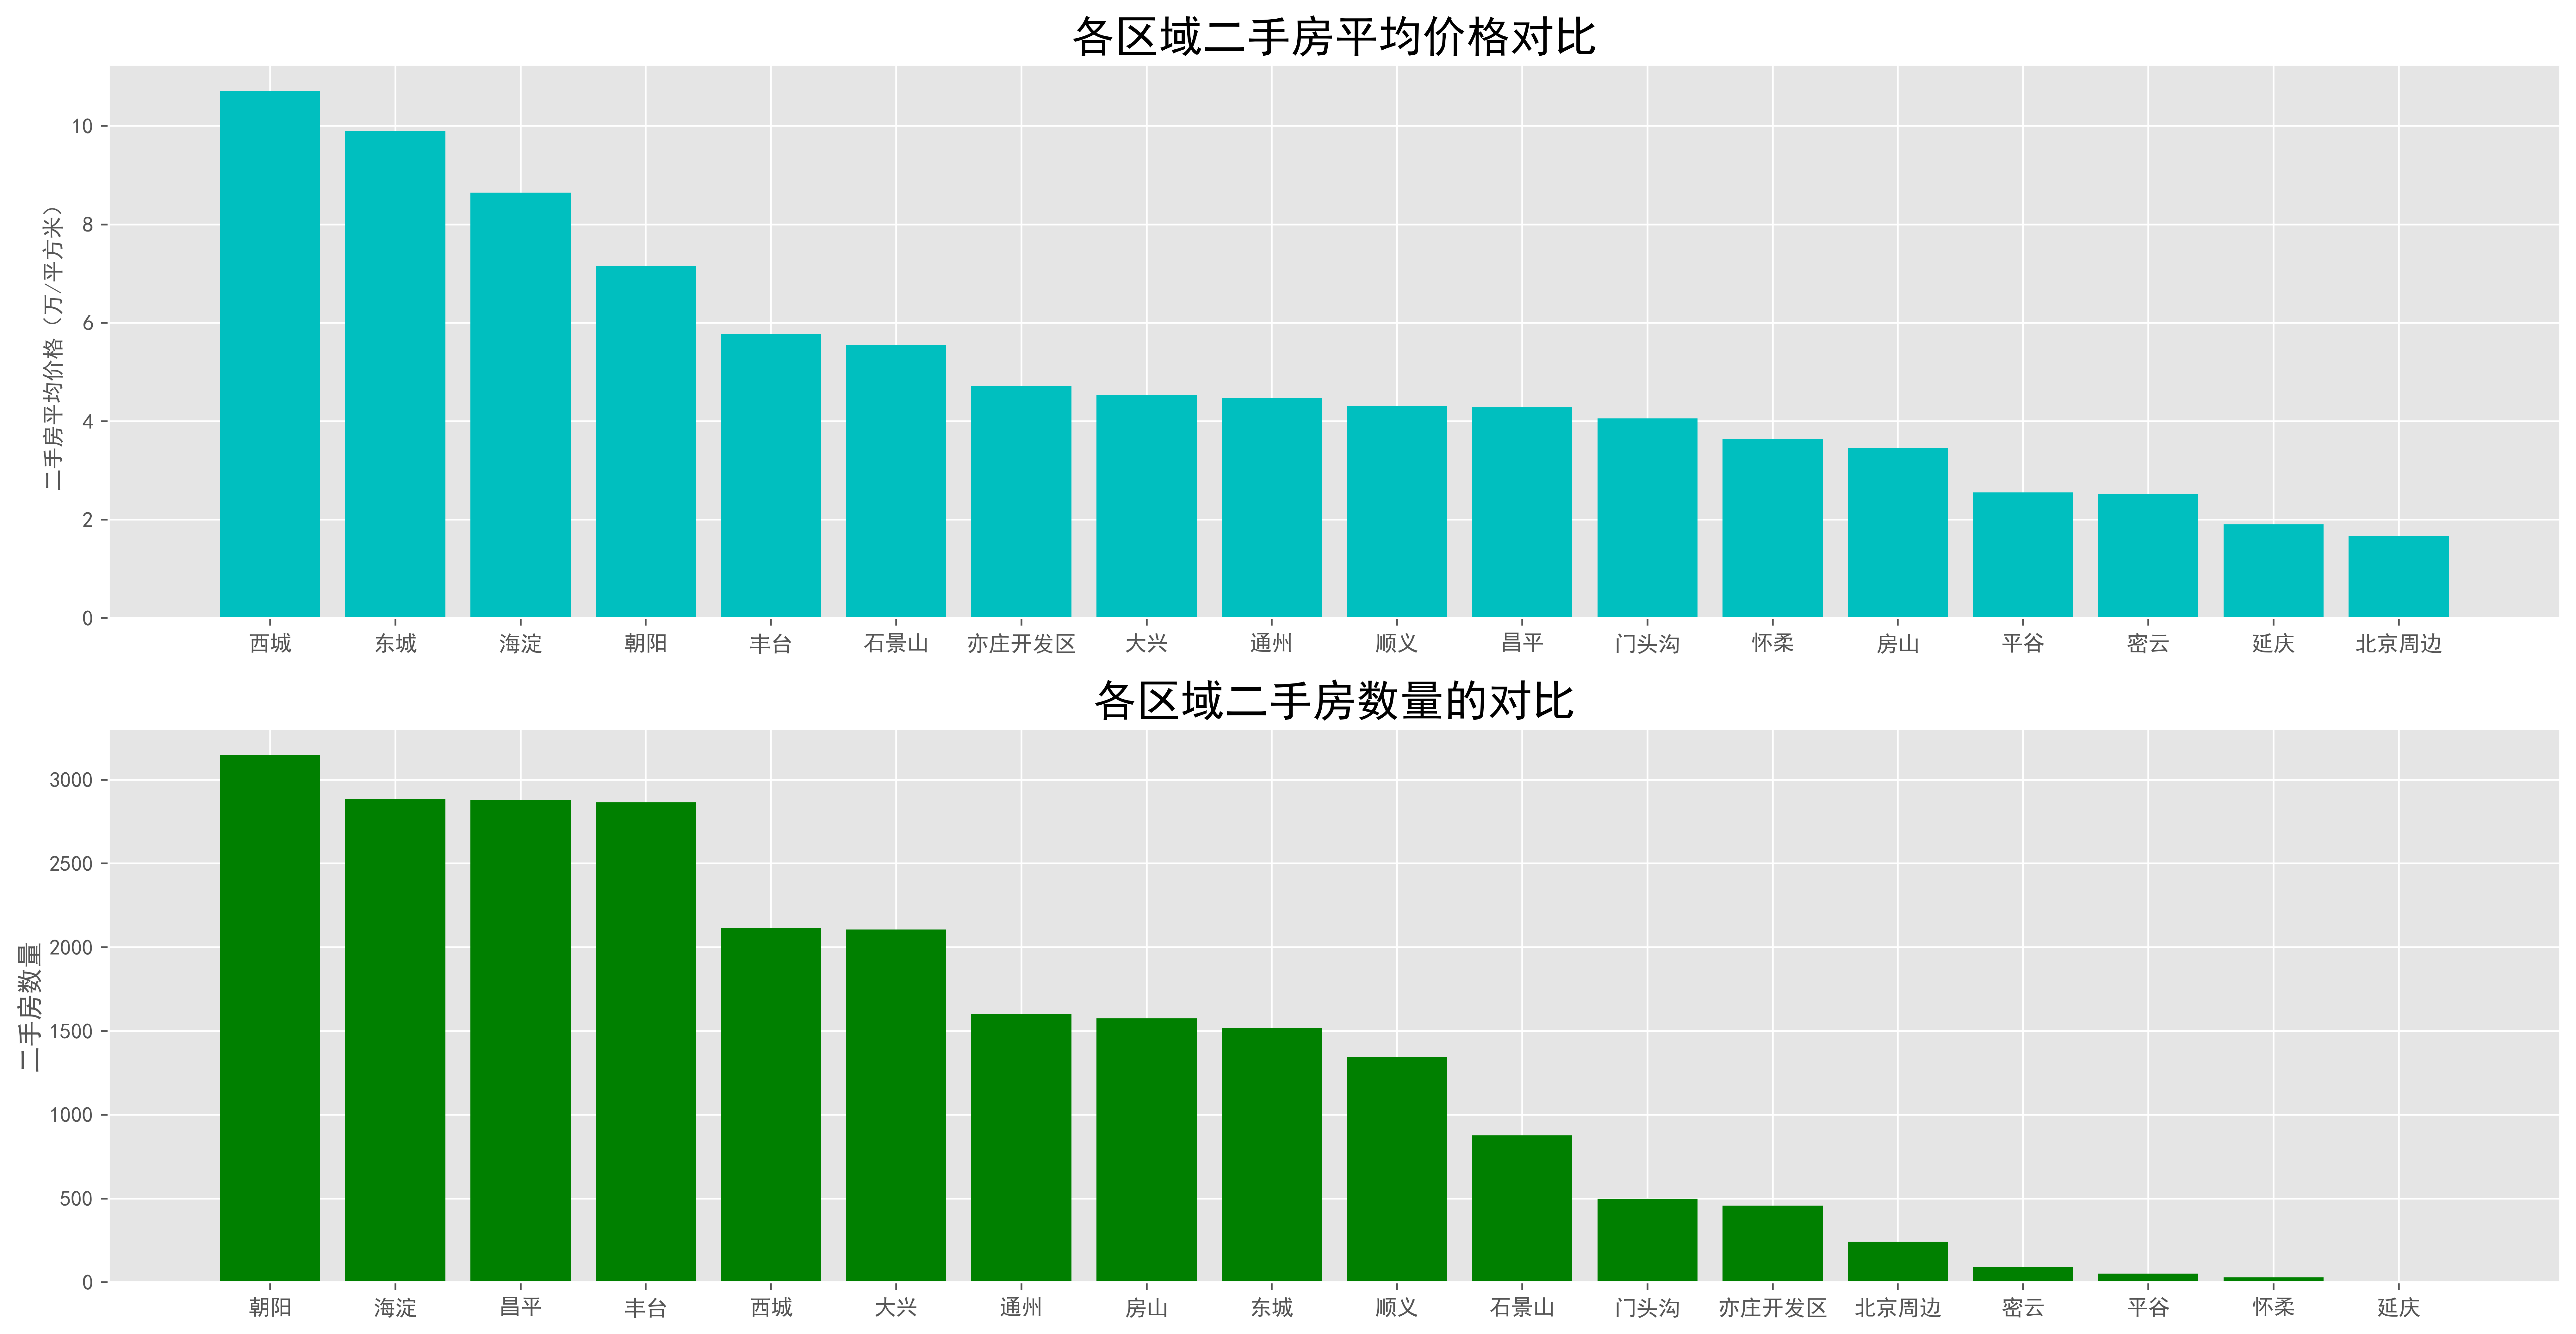

In [54]:
from matplotlib import pyplot as plt
# 画图步骤 1.支持中文 2.使用风格 3.定画布大小精细度 4.标题 5.纵坐标标题 6.画什么图 7.展示
plt.rc('font', family = 'SimHei', size = 13)
plt.style.use('ggplot')

plt.figure(dpi = 500, figsize = (20, 10))
plt.subplot(211)#两行一列 第一个  即上下两块 画在上面
plt.title('各区域二手房平均价格对比', fontsize = 20)#图片名称
plt.ylabel('二手房平均价格（万/平方米）', fontsize = 10)#y轴标签
plt.bar(df_mean.index, df_mean.values, color = 'c')
plt.xticks(fontsize=10)

plt.subplot(212)
plt.title('各区域二手房数量的对比', fontsize = 20)
plt.ylabel('二手房数量')
plt.bar(df_num.index, df_num.values, color = 'g')
plt.show()

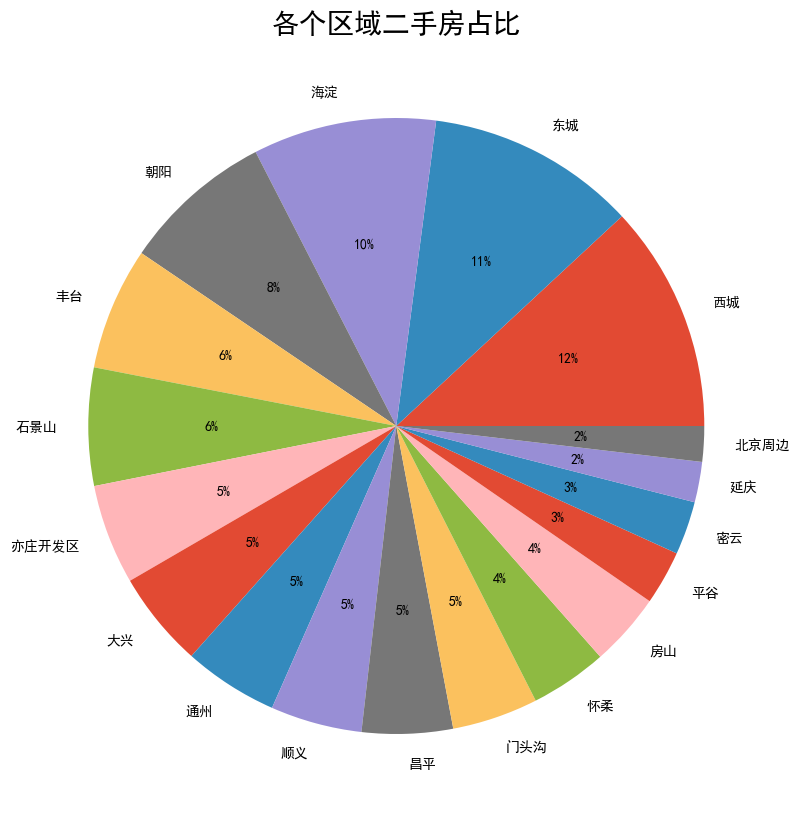

In [55]:
plt.figure(figsize= (10, 10))
plt.subplot(111)
plt.title('各个区域二手房占比', fontsize = 20)
plt.pie(df_mean, radius = 1, labels = df_mean.index, autopct = '%1.f%%')
plt.show()

#### 房价和房屋面积区段的二手房数量统计

In [61]:
# 获取二手房总价的范围
def get_price_range(price, base = 100):
    return '{0}-{1}'.format(int(price//base)*base, int(price//base)*base + base)#python的格式化01为位置索引
# 获取二手房面积的范围
def get_size_range(size, base = 30):
    return '{0}-{1}'.format(int(size//base)*base, int(size//base)*base + base)

# 筛选房屋总价小于1000万的二手房信息进行统计 \d+表示一到多个数字
df['GroupPrice'] = df['Price'].apply(get_price_range)
df['GroupPriceSplit'] = df['GroupPrice'].str.extract(r'(\d+)-\d+', expand = False)
df['GroupPriceSplit'] = df['GroupPriceSplit'].astype('int')

sort_by_price_range = df.loc[df['GroupPriceSplit'] < 1000, ['GroupPrice', 'Price', 'GroupPriceSplit']]
sort_by_price_range.set_index('GroupPrice', inplace = True)
sort_by_price_range.sort_values(by = 'GroupPriceSplit', inplace = True)

# 筛选房屋面积小于300平的二手房信息统计
df['GroupSize']

# 对房价和房屋面积分组

# 房价范围 vs 房屋数量 可视化分析

<class 'pandas.core.series.Series'>


#### 西城 & 海淀 各地方二手房房价对比

In [ ]:
# 筛选区域为西城和海淀的数据

# 西城区各位置房价对比

# 海淀区各位置房价对比
